In [1]:
import sys
from scipy.stats import t

from mlos.Optimizers.OptimizationProblem import OptimizationProblem, Objective, SeriesObjective
from mlos.Optimizers.BayesianOptimizer import BayesianOptimizer
from mlos.Optimizers.ExperimentDesigner.UtilityFunctions.SeriesDifferenceUtilityFunction import series_difference_utility_function_config_store
from mlos.Spaces import SimpleHypergrid, ContinuousDimension, DiscreteDimension, CategoricalDimension
from mlos.Optimizers.BayesianOptimizerConfigStore import bayesian_optimizer_config_store
from mlos.Optimizers.BayesianOptimizerFactory import BayesianOptimizerFactory
from mlos.Optimizers.OptimumDefinition import OptimumDefinition
from mlos.Spaces import Point
from mlos.Optimizers.BayesianOptimizerConfigStore import bayesian_optimizer_config_store

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.fft as fft
import math
from IPython.display import Audio
import random
from threading import Thread
import time
from multiprocessing import Process
sound_file = '/home/zack/beep.mp3'

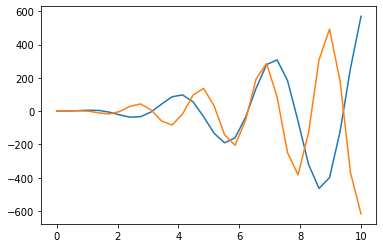

In [2]:

def f(x,a,b,c):
    return ((a*x)**b)*math.sin(c*x)
x_space = np.linspace(0,10,30)
y_space = []
for x in x_space:
    y_space.append(f(x,2.5,2,2))
    
x_space_2 = np.linspace(0,10,30)
y_space_2 = []
for x in x_space_2:
    y_space_2.append(f(x,2.5,2,3))
plt.plot(x_space,y_space)
plt.plot(x_space_2,y_space_2)


In [3]:
def difference_function(series):
    summed_squared_error = 0
    for index in range(len(series)):
        error = (series[index] - f(time_dimension[index],2.5,2,2))
        summed_squared_error += error*error
    return summed_squared_error


In [4]:
time_dimension = CategoricalDimension(name="time", values=np.linspace(0,10,30).tolist())
target_series = []
for x in time_dimension.linspace():
    target_series.append(f(x,2.5,2,2))
target_series_np = np.array(target_series)


input_space = SimpleHypergrid(
    name="input",
    dimensions=[
        ContinuousDimension(name="a", min=0, max=5),
        DiscreteDimension(name="b", min=0, max=5),
        ContinuousDimension(name="c", min=0, max=5)
    ]
)
context_space = SimpleHypergrid(
    name="context_space",
    dimensions=[
        time_dimension
    ]
)

output_space = SimpleHypergrid(
    name="output",
    dimensions=[
        ContinuousDimension(name="f(time)", min=0, max=1000)
    ]
)

optimization_problem = OptimizationProblem(
        parameter_space=input_space,
        objective_space=output_space,
        context_space=context_space,
        objectives=[
            SeriesObjective(name="f(time)", minimize=True, target_series=target_series_np, series_modulation_dimension=time_dimension)
        ]
    )

In [5]:
difference_function([5.2,8.6,10.5])

150.57240278856997

In [6]:
print(difference_function)

<function difference_function at 0x000001C374260670>


In [7]:
optimizer_config = bayesian_optimizer_config_store.default

optimizer_config.min_samples_required_for_guided_design_of_experiments = 20
optimizer_config.homogeneous_random_forest_regression_model_config.decision_tree_regression_model_config.n_new_samples_before_refit = 3
optimizer_config.homogeneous_random_forest_regression_model_config.samples_fraction_per_estimator = 0.8
optimizer_config.homogeneous_random_forest_regression_model_config.n_estimators = 25

optimizer_config.experiment_designer_config.utility_function_implementation="SeriesDifferenceUtilityFunction"
optimizer_config.experiment_designer_config.confidence_bound_utility_function_config = None
optimizer_config.experiment_designer_config.series_difference_utility_function_config = series_difference_utility_function_config_store.default
optimizer_config.experiment_designer_config.random_search_optimizer_config.num_samples_per_iteration = 5000
optimizer_factory = BayesianOptimizerFactory()
optimizer = optimizer_factory.create_local_optimizer(
    optimization_problem=optimization_problem,
    optimizer_config=optimizer_config
)

08/04/2021 04:16:46 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizerFactory.py:  43 -    create_local_optimizer() ] Creating a bayesian optimizer with config: {
  "surrogate_model_implementation": "HomogeneousRandomForestRegressionModel",
  "experiment_designer_implementation": "ExperimentDesigner",
  "min_samples_required_for_guided_design_of_experiments": 20,
  "homogeneous_random_forest_regression_model_config.n_estimators": 25,
  "homogeneous_random_forest_regression_model_config.features_fraction_per_estimator": 1,
  "homogeneous_random_forest_regression_model_config.samples_fraction_per_estimator": 0.8,
  "homogeneous_random_forest_regression_model_config.regressor_implementation": "DecisionTreeRegressionModel",
  "homogeneous_random_forest_regression_model_config.decision_tree_regression_model_config.criterion": "mse",
  "homogeneous_random_forest_regression_model_config.decision_tree_regression_model_config.splitter": "best",
  "homogeneous_random_forest_regression_m

08/04/2021 04:16:46 -   BayesianOptimizerFactory -    INFO - [HomogeneousRandomForestRegressionModel.py: 120 -        _create_estimators() ] Creating DecisionTreeRegressionModel with the input_space:   Name: estimator_12_input_space
  Dimensions:
    contains_context: {True}
    input___c: [0.00, 5.00]
    input___a: [0.00, 5.00]
    input___b: {0, 1, ... , 5}
    context_space___time: {0.0, 0.3448275862068966, 0.6896551724137931, ...}
08/04/2021 04:16:46 -   BayesianOptimizerFactory -    INFO - [HomogeneousRandomForestRegressionModel.py: 120 -        _create_estimators() ] Creating DecisionTreeRegressionModel with the input_space:   Name: estimator_13_input_space
  Dimensions:
    input___a: [0.00, 5.00]
    input___c: [0.00, 5.00]
    input___b: {0, 1, ... , 5}
    contains_context: {True}
    context_space___time: {0.0, 0.3448275862068966, 0.6896551724137931, ...}
08/04/2021 04:16:46 -   BayesianOptimizerFactory -    INFO - [HomogeneousRandomForestRegressionModel.py: 120 -        _c

In [24]:
placeholder_context = Point(time=time_dimension[0])


for current_iteration in range(100):
    # placeholder_context means nothing. Time will be overwritten by SeriesDifferenceUtilityFunction. 
    suggested_value = optimizer.suggest(context=placeholder_context)
    input_values_df = suggested_value.to_dataframe()
    
    function_values = []
    for time in time_dimension:
        #context = Point(time=time)
        # EVALUATE
        #
        #print(current_iteration)
        function_value_at_time = f(
            time,
            suggested_value["a"],
            suggested_value["b"],
            suggested_value["c"]
        )
        function_values.append(function_value_at_time)
        
    for x in range(1,len(time_dimension)):
        input_values_df = input_values_df.append(input_values_df.iloc[0])
    context_values_df = pd.DataFrame({
        'time': time_dimension.linspace()
    })
    target_values_df = pd.DataFrame({
       'f(time)': function_values
   })

    # REGISTER
    #
    optimizer.register(input_values_df, target_values_df, context_values_df)


08/04/2021 04:48:38 -   BayesianOptimizerFactory -    INFO - [ExperimentDesigner.py: 198 -                   suggest() ] Producing random suggestion: {
  "a": 1.7549368931465803,
  "b": 0,
  "c": 0.06422902297983313
}
08/04/2021 04:48:38 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:48:38 -   BayesianOptimizerFactory -    INFO - [ExperimentDesigner.py: 198 -                   suggest() ] Producing random suggestion: {
  "a": 2.5892338580662373,
  "b": 0,
  "c": 4.095673066290939
}
08/04/2021 04:48:38 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:48:53 -   BayesianOptimizerFactory -    INFO - [ExperimentDesigner.py: 202 -                   suggest() ] Produced a guided suggestion: {
  "a": 0.9695962145982251,
  "b": 3,
  "c": 3.357716571837051
}
08/04/2021 04:48:53

08/04/2021 04:51:33 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:51:49 -   BayesianOptimizerFactory -    INFO - [ExperimentDesigner.py: 202 -                   suggest() ] Produced a guided suggestion: {
  "a": 0.981345112859397,
  "b": 3,
  "c": 4.099835561277906
}
08/04/2021 04:51:49 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:51:49 -   BayesianOptimizerFactory -    INFO - [ExperimentDesigner.py: 198 -                   suggest() ] Producing random suggestion: {
  "a": 3.4556256792993088,
  "b": 2,
  "c": 2.4649562992811056
}
08/04/2021 04:51:49 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:52:05 -   BayesianOptimizerFactory -    INFO - [Experiment

08/04/2021 04:54:57 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:54:57 -   BayesianOptimizerFactory -    INFO - [ExperimentDesigner.py: 198 -                   suggest() ] Producing random suggestion: {
  "a": 3.9504375824574387,
  "b": 3,
  "c": 3.4242755127536384
}
08/04/2021 04:54:57 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:55:13 -   BayesianOptimizerFactory -    INFO - [ExperimentDesigner.py: 202 -                   suggest() ] Produced a guided suggestion: {
  "a": 0.9322471742026972,
  "b": 2,
  "c": 2.229063386442836
}
08/04/2021 04:55:13 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:55:13 -   BayesianOptimizerFactory -    INFO - [Experimen

08/04/2021 04:57:28 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:57:28 -   BayesianOptimizerFactory -    INFO - [ExperimentDesigner.py: 198 -                   suggest() ] Producing random suggestion: {
  "a": 1.9895674699897463,
  "b": 5,
  "c": 0.5362727720216259
}
08/04/2021 04:57:28 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:57:28 -   BayesianOptimizerFactory -    INFO - [ExperimentDesigner.py: 198 -                   suggest() ] Producing random suggestion: {
  "a": 4.7879103657727,
  "b": 0,
  "c": 4.40024332838461
}
08/04/2021 04:57:28 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 04:57:45 -   BayesianOptimizerFactory -    INFO - [ExperimentDesi

08/04/2021 05:01:59 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.
08/04/2021 05:01:59 -   BayesianOptimizerFactory -    INFO - [ExperimentDesigner.py: 198 -                   suggest() ] Producing random suggestion: {
  "a": 0.9487180632133746,
  "b": 5,
  "c": 2.69266581184568
}
08/04/2021 05:01:59 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizer.py: 153 -                  register() ] Registering 30 parameters and 30 objectives.


KeyboardInterrupt: 

In [25]:
optimum = optimizer.optimum(optimum_definition=OptimumDefinition.BEST_SERIES_ERROR_FUNCTION_MINIMIZATION, context=placeholder_context.to_dataframe())
print(optimum)

{
  "a": 1.6239158547735548,
  "b": 1,
  "c": 1.2759498004719938
}


In [59]:
generate_surrogate_model_guesses(x_space, params):
    optimizer.surrogate_model

0        0.005465
1        0.439895
2        0.320003
3       -1.177605
4       -1.182273
5        3.008579
6        3.184552
7       -6.146862
8       -6.217746
9        5.560539
10      10.030944
11       0.614053
12     -11.044011
13      -9.609507
14      -1.022974
15       3.590584
16     -13.621218
17       0.936457
18       9.104002
19      22.068453
20     -12.247707
21     -34.013052
22     -37.097003
23     -43.970501
24     -65.275508
25      22.570474
26      50.549300
27       2.164855
28   -1721.282822
29   -1735.900137
Name: predicted_value, dtype: float64


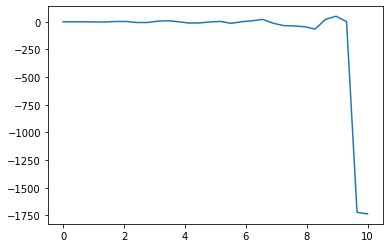

In [30]:
params=pd.DataFrame({"input.a":[1.5],"input.b":[2],"input.c":[4], "contains_context":[True]})
series_vals_df = pd.DataFrame({
    "context_space.time": time_dimension.linspace()
})
feature_values_pandas_frame_merged = params.merge(series_vals_df, how="cross")
#print(feature_values_pandas_frame_merged)
multi_objective_predictions = optimizer.surrogate_model.predict(features_df=feature_values_pandas_frame_merged)
predictions_df = multi_objective_predictions[0].get_dataframe()
y_vals = predictions_df["predicted_value"]
print(y_vals)
plt.plot(time_dimension.linspace(), y_vals)

In [76]:
optimizer.surrogate_model.trained

True

In [78]:
def difference_function(series):
    summed_squared_error = 0
    for index in range(len(series)):
        error = (series[index] - f(time_dimension[index],2.5,2,2))
        summed_squared_error += error*error
    return summed_squared_error

In [83]:
difference_function(test_series)

44094.48935203241

In [88]:
sum((target_series_np-test_series_np)**2)

44094.48935203241